In [104]:
# Importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from scipy.stats import skew, kurtosis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [105]:
df = pd.read_csv(r'C:\Users\YUCHENG WANG\Desktop\MBAN Summer\MBAN6110\Data\conversion_data.csv')

## Part 1: Exploratory Data Analysis
This section discusses the data preprocessing steps, encompassing Data Cleaning and Exploratory Data Analysis (EDA), performed on the conversion dataset. 

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [107]:
df.describe(include='all')

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,433,431,1093,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,999.500000,1000.500000,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.256500,2.354000,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.370974,2.335682,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


In [108]:
# unnamed is not necessary for the analysis therefore we're dropping the unnamed column.
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [109]:
# Checking and making sure the unnamed:0 columns are gone
df.head()

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,1,North America,youtube,M,4,5,2,1,2,3.90,...,33,23,46,57,4,5,5,4,6,1
1,2,South America,organic,F,2,5,0,1,5,1.31,...,28,39,24,51,5,6,7,6,2,0
2,3,Australia,instagram,M,3,4,0,-3,5,3.26,...,34,22,34,31,1,3,3,2,3,1
3,4,North America,facebook,M,1,0,0,5,0,2.66,...,26,43,22,39,3,4,7,7,1,0
4,5,Asia,instagram,F,1,5,2,2,3,2.76,...,54,30,47,57,6,6,5,2,4,1


In [110]:
# Checking if there is any missing data
df.isnull().sum()

visitor_id           0
visitor_location     0
marketing_channel    0
gender               0
product_views_Mon    0
product_views_Tue    0
product_views_Wed    0
product_views_Thu    0
product_views_Fri    0
avg_rating_Mon       0
avg_rating_Tue       0
avg_rating_Wed       0
avg_rating_Thu       0
avg_rating_Fri       0
avg_price_Mon        0
avg_price_Tue        0
avg_price_Wed        0
avg_price_Thu        0
avg_price_Fri        0
time_on_site_Mon     0
time_on_site_Tue     0
time_on_site_Wed     0
time_on_site_Thu     0
time_on_site_Fri     0
pages_visited_Mon    0
pages_visited_Tue    0
pages_visited_Wed    0
pages_visited_Thu    0
pages_visited_Fri    0
converted_Fri        0
dtype: int64

In [111]:
#Dropping the missing value
df2 = df.dropna()

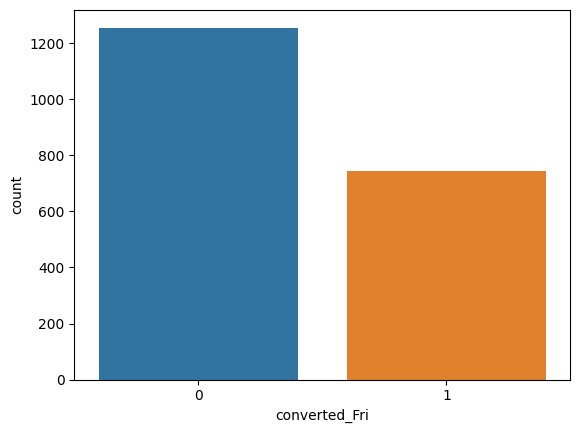

In [112]:
# Display the distribution of 'converted_Fri'
sns.countplot(x='converted_Fri', data=df2)
plt.show()

In [119]:
# Check for duplicate rows, excluding the 'visitor_id' column as 'id' column is a unique identifier for each recipe
duplicate_rows = df2.duplicated(subset=df2.columns.difference(['visitor_id']))

In [120]:
# Count the number of duplicate rows and there is no duplicate rows. No need to drop duplicatets
num_duplicate_rows = duplicate_rows.sum()
num_duplicate_rows

0

In [121]:
numerical_columns = ['product_views_Mon', 'product_views_Tue', 'product_views_Wed', 'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon', 'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
                     'avg_price_Mon','avg_price_Tue','avg_price_Wed','avg_price_Thu','avg_price_Fri','time_on_site_Mon','time_on_site_Tue','time_on_site_Wed','time_on_site_Thu','time_on_site_Fri','pages_visited_Mon',
                     'pages_visited_Tue','pages_visited_Wed','pages_visited_Thu','pages_visited_Fri']

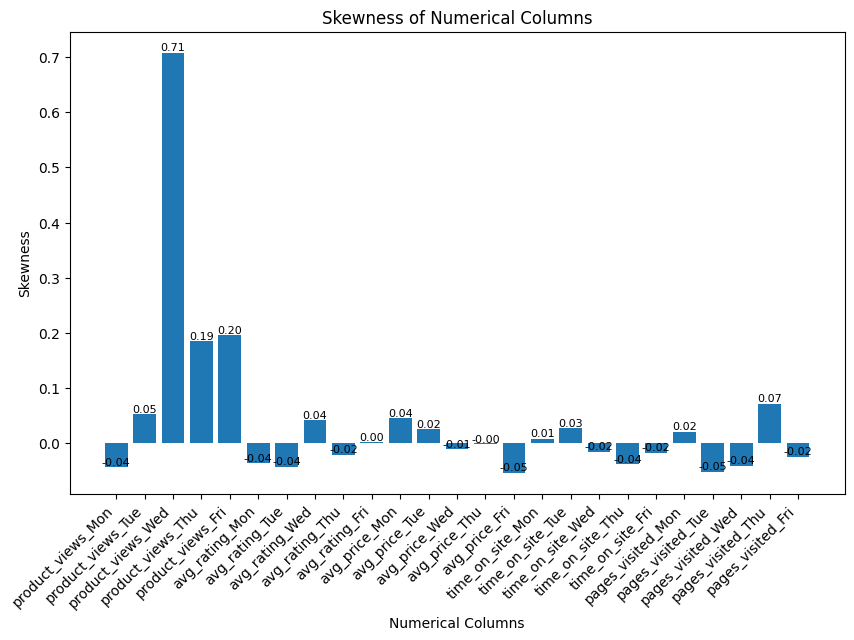

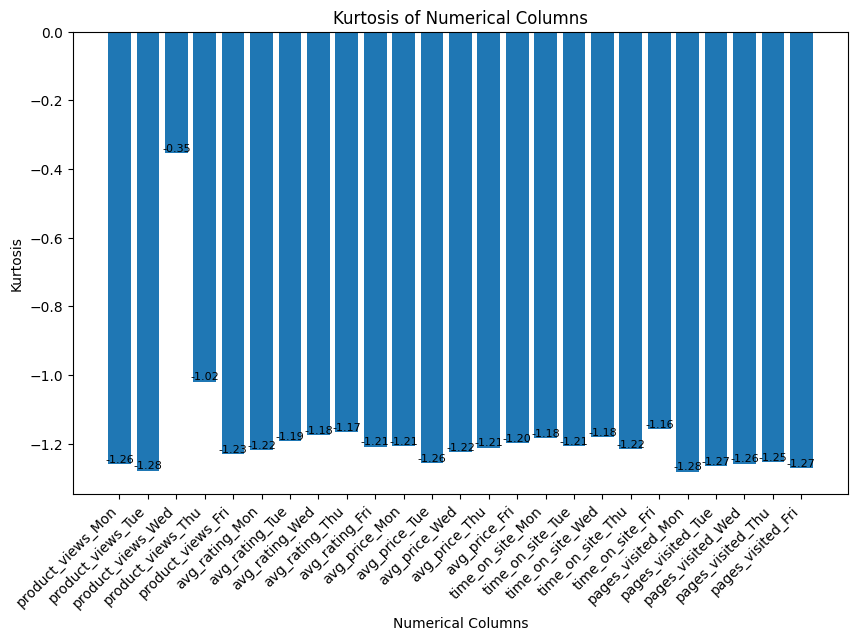

In [122]:
# Calculate skewness and kurtosis for each numerical column
skewness_list = [skew(df2[column].dropna()) for column in numerical_columns]
kurtosis_list = [kurtosis(df2[column].dropna()) for column in numerical_columns]

# Plot the graph for skewness
plt.figure(figsize=(10, 6))
plt.bar(numerical_columns, skewness_list)
plt.title('Skewness of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45, ha='right')

# Label each bar with the column name and skewness value
for i, v in enumerate(skewness_list):
    plt.text(i, v, f'{skewness_list[i]:.2f}', ha='center', va='bottom', fontsize=8)

plt.show()

# Plot the graph for kurtosis
plt.figure(figsize=(10, 6))
plt.bar(numerical_columns, kurtosis_list)
plt.title('Kurtosis of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Kurtosis')
plt.xticks(rotation=45, ha='right')

# Label each bar with the column name and kurtosis value
for i, v in enumerate(kurtosis_list):
    plt.text(i, v, f'{kurtosis_list[i]:.2f}', ha='center', va='bottom', fontsize=8)

plt.show()

In [123]:
# Calculate skewness and kurtosis for each numerical column, this time, we choose to display them in text format.
for column in numerical_columns:
    skewness_values = []
    s = skew(df2[column])
    k = kurtosis(df2[column])
    print(f'{column}: skewness = {s}, kurtosis = {k}')

product_views_Mon: skewness = -0.04339723992227179, kurtosis = -1.2595334694359583
product_views_Tue: skewness = 0.05239895534857225, kurtosis = -1.278349926686584
product_views_Wed: skewness = 0.7078649532941341, kurtosis = -0.35422487943281133
product_views_Thu: skewness = 0.18508333245295, kurtosis = -1.019154529926297
product_views_Fri: skewness = 0.19578852072874067, kurtosis = -1.230292770208432
avg_rating_Mon: skewness = -0.036569401570234646, kurtosis = -1.2192260019428236
avg_rating_Tue: skewness = -0.04306188757167769, kurtosis = -1.192970789047595
avg_rating_Wed: skewness = 0.04108520953174745, kurtosis = -1.175952222375065
avg_rating_Thu: skewness = -0.021059652207191585, kurtosis = -1.1665255431135517
avg_rating_Fri: skewness = 0.0011903008781474437, kurtosis = -1.2093578638463074
avg_price_Mon: skewness = 0.04475490871743474, kurtosis = -1.2066916544930508
avg_price_Tue: skewness = 0.02480764664794289, kurtosis = -1.2566830578426142
avg_price_Wed: skewness = -0.0111900869

In [124]:
#based on skewness and kurtosis, we use z score to remove outliers
if abs(s) > 1:
        df2[column] = df2[column].apply(lambda x: np.log(x + 1))

In [125]:
z_scores = zscore(df2[numerical_columns])

In [126]:
threshold = 3

In [127]:
df2 = df2[(np.abs(z_scores) < threshold).all(axis=1)]

In [128]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_id         2000 non-null   int64  
 1   visitor_location   2000 non-null   object 
 2   marketing_channel  2000 non-null   object 
 3   gender             2000 non-null   object 
 4   product_views_Mon  2000 non-null   int64  
 5   product_views_Tue  2000 non-null   int64  
 6   product_views_Wed  2000 non-null   int64  
 7   product_views_Thu  2000 non-null   int64  
 8   product_views_Fri  2000 non-null   int64  
 9   avg_rating_Mon     2000 non-null   float64
 10  avg_rating_Tue     2000 non-null   float64
 11  avg_rating_Wed     2000 non-null   float64
 12  avg_rating_Thu     2000 non-null   float64
 13  avg_rating_Fri     2000 non-null   float64
 14  avg_price_Mon      2000 non-null   float64
 15  avg_price_Tue      2000 non-null   float64
 16  avg_price_Wed      2000 

seems like no outlier need to be dropped

In [129]:
# we did descriptive analysis here, and we found that the difference of mean value and std from time_on_site(monday to Friday) is siginificant larger than other variables
descriptive_stats = df2.describe()
print(descriptive_stats)

        visitor_id  product_views_Mon  product_views_Tue  product_views_Wed   
count  2000.000000        2000.000000        2000.000000        2000.000000  \
mean   1000.500000           2.541500           2.440500           2.441000   
std     577.494589           1.704914           1.715206           2.343345   
min       1.000000           0.000000           0.000000           0.000000   
25%     500.750000           1.000000           1.000000           0.000000   
50%    1000.500000           3.000000           2.000000           2.000000   
75%    1500.250000           4.000000           4.000000           4.000000   
max    2000.000000           5.000000           5.000000           9.000000   

       product_views_Thu  product_views_Fri  avg_rating_Mon  avg_rating_Tue   
count        2000.000000        2000.000000     2000.000000     2000.000000  \
mean            2.256500           2.354000        3.023990        3.042760   
std             2.370974           2.335682        

From the numerical part, in this point, we may make a hypothesis that time on site has a significant impact on the converted outcome in Friday.

In [130]:
df2.groupby('visitor_location').count()

,visitor_id,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
visitor_location,,,,,,,,,,,,,,,,,,,,,
Asia,369,369,369,369,369,369,369,369,369,369,...,369,369,369,369,369,369,369,369,369,369
Australia,403,403,403,403,403,403,403,403,403,403,...,403,403,403,403,403,403,403,403,403,403
Europe,383,383,383,383,383,383,383,383,383,383,...,383,383,383,383,383,383,383,383,383,383
North America,412,412,412,412,412,412,412,412,412,412,...,412,412,412,412,412,412,412,412,412,412
South America,433,433,433,433,433,433,433,433,433,433,...,433,433,433,433,433,433,433,433,433,433


In [131]:
df2.groupby('marketing_channel').count()

,visitor_id,visitor_location,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
marketing_channel,,,,,,,,,,,,,,,,,,,,,
facebook,394,394,394,394,394,394,394,394,394,394,...,394,394,394,394,394,394,394,394,394,394
google,399,399,399,399,399,399,399,399,399,399,...,399,399,399,399,399,399,399,399,399,399
instagram,431,431,431,431,431,431,431,431,431,431,...,431,431,431,431,431,431,431,431,431,431
organic,407,407,407,407,407,407,407,407,407,407,...,407,407,407,407,407,407,407,407,407,407
youtube,369,369,369,369,369,369,369,369,369,369,...,369,369,369,369,369,369,369,369,369,369


In [132]:
df2.groupby('gender').count()

,visitor_id,visitor_location,marketing_channel,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
gender,,,,,,,,,,,,,,,,,,,,,
F,1093,1093,1093,1093,1093,1093,1093,1093,1093,1093,...,1093,1093,1093,1093,1093,1093,1093,1093,1093,1093
M,907,907,907,907,907,907,907,907,907,907,...,907,907,907,907,907,907,907,907,907,907


In [133]:
df2.groupby('converted_Fri').count()

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Mon,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri
converted_Fri,,,,,,,,,,,,,,,,,,,,,
0,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,...,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256
1,744,744,744,744,744,744,744,744,744,744,...,744,744,744,744,744,744,744,744,744,744


In [134]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_id         2000 non-null   int64  
 1   visitor_location   2000 non-null   object 
 2   marketing_channel  2000 non-null   object 
 3   gender             2000 non-null   object 
 4   product_views_Mon  2000 non-null   int64  
 5   product_views_Tue  2000 non-null   int64  
 6   product_views_Wed  2000 non-null   int64  
 7   product_views_Thu  2000 non-null   int64  
 8   product_views_Fri  2000 non-null   int64  
 9   avg_rating_Mon     2000 non-null   float64
 10  avg_rating_Tue     2000 non-null   float64
 11  avg_rating_Wed     2000 non-null   float64
 12  avg_rating_Thu     2000 non-null   float64
 13  avg_rating_Fri     2000 non-null   float64
 14  avg_price_Mon      2000 non-null   float64
 15  avg_price_Tue      2000 non-null   float64
 16  avg_price_Wed      2000 

In [135]:
categorical_columns = ['visitor_location', 'marketing_channel', 'gender']

<Axes: xlabel='visitor_location'>

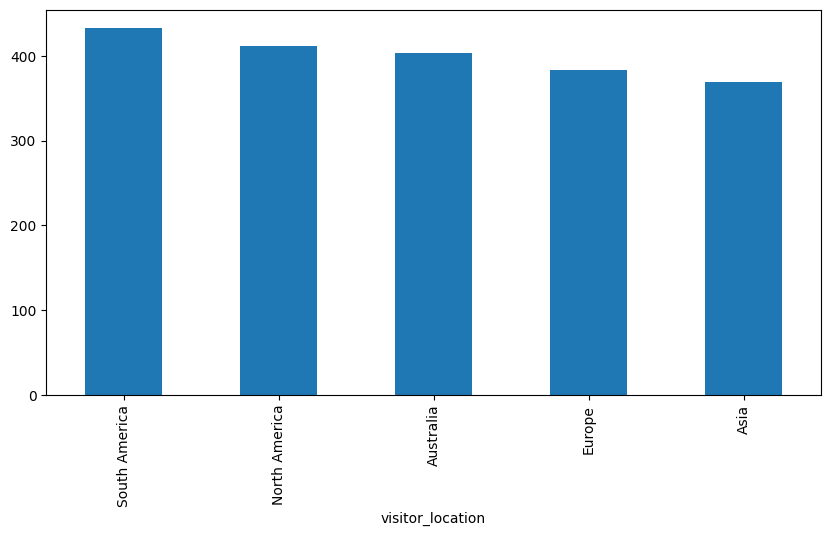

In [136]:
df2.groupby('visitor_location')['converted_Fri'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='marketing_channel'>

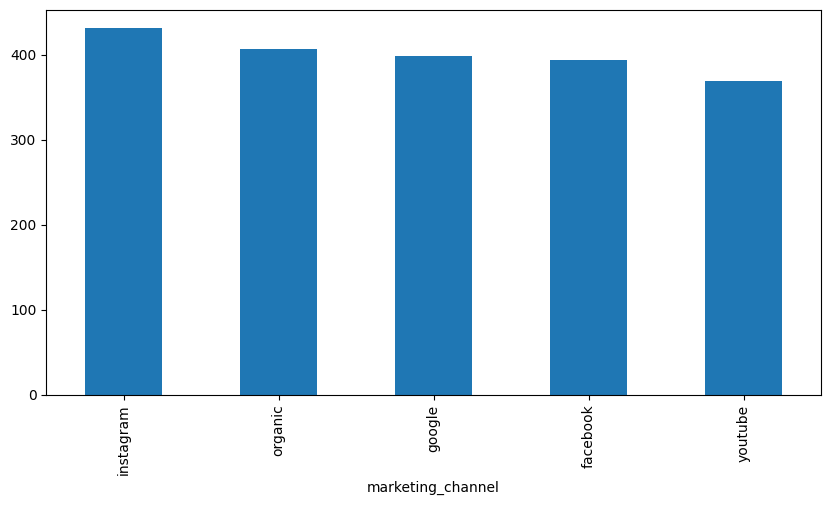

In [137]:
df2.groupby('marketing_channel')['converted_Fri'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='gender'>

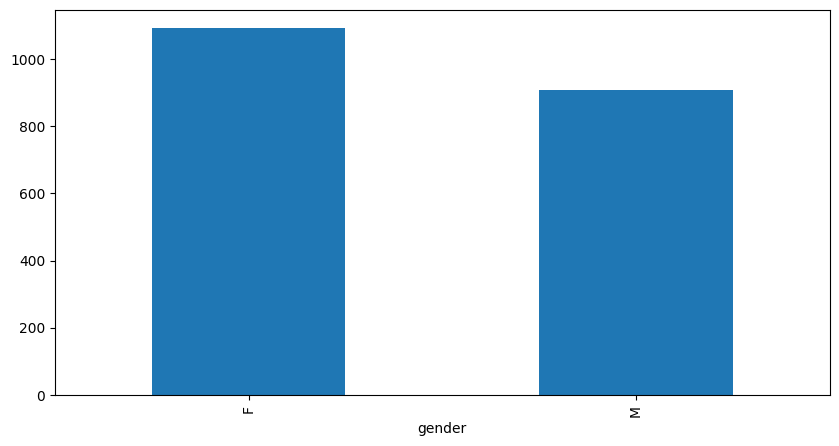

In [138]:
df2.groupby('gender')['converted_Fri'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

So from the categorical part, we can make a hpothesis that people's location in South America are more likely to be converted on Friday, people are more likely to be converted through the Instagram, and female are more likely to be converted than male.

## Part 2: Feature Engineering 
Feature engineering is a critical step in the data preprocessing pipeline in this model as we transform and select relevant features from the raw data to improve the performance of the model.

Create some dummy variables from categorical variables

In [139]:
dummies_locations = pd.get_dummies(df2.visitor_location, dtype=int)

In [140]:
dummies_locations.rename(columns = {1:'Asia', 2:'Australia', 3:'Europe', 4:'North America', 5:'South America'}, inplace = True)

In [141]:
df2 = pd.concat([df2,dummies_locations], axis=1)

In [142]:
dummies_marketing_channel= pd.get_dummies(df2.marketing_channel, dtype=int)

In [143]:
dummies_marketing_channel.rename(columns = {1:'facebook', 2:'google', 3:'instagram', 4:'organic', 5:'youtube'}, inplace = True)

In [144]:
df2 = pd.concat([df2,dummies_marketing_channel], axis=1)

In [145]:
dummies_gender = pd.get_dummies(df2.gender, dtype=int)

In [146]:
dummies_gender.rename(columns = {1:'F', 2:'M'}, inplace = True)

In [147]:
df2 = pd.concat([df2,dummies_gender], axis=1)

In [151]:
#Since we already create the dummy variable for vistor_location,marketing_channel,gender, now we can drop it. Also, we'll drop the column of visitor_id, since we'll not use it in the future modelling. 
df2.drop(['visitor_id','visitor_location','marketing_channel','gender'], axis=1, inplace=True)

In [152]:
df2.head(10)

,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,avg_rating_Wed,avg_rating_Thu,avg_rating_Fri,...,Europe,North America,South America,facebook,google,instagram,organic,youtube,F,M
0,4,5,2,1,2,3.90,2.19,4.87,3.47,1.24,...,0,1,0,0,0,0,0,1,0,1
1,2,5,0,1,5,1.31,2.16,1.98,3.09,1.80,...,0,0,1,0,0,0,1,0,1,0
2,3,4,0,-3,5,3.26,4.79,3.12,2.58,4.58,...,0,0,0,0,0,1,0,0,0,1
3,1,0,0,5,0,2.66,4.79,3.41,2.28,3.36,...,0,1,0,1,0,0,0,0,0,1
4,1,5,2,2,3,2.76,2.38,3.32,1.62,1.74,...,0,0,0,0,0,1,0,0,1,0
5,2,2,1,1,0,2.80,3.60,2.28,4.36,4.96,...,0,0,1,0,0,0,1,0,0,1
6,1,1,0,5,5,3.32,4.75,4.61,2.86,1.57,...,0,1,0,0,0,1,0,0,0,1
7,2,1,6,0,0,3.25,1.89,4.03,2.31,4.67,...,0,0,0,0,0,0,0,1,1,0
8,4,2,0,0,3,2.12,1.10,4.31,2.86,4.01,...,1,0,0,0,0,0,0,1,0,1
9,3,1,0,0,0,2.10,4.18,2.15,4.24,3.18,...,0,0,0,0,0,0,1,0,0,1


Now, the dummy variable have been inserted into our dataframe

## Part 3: Data Preprocessing
In order to input data to the model, we will be preprocessing it.

In [153]:
# Divide columns into categorical, numerical and the target column
cat_columns = ['Asia', 'Australia','Europe','North America','South America','facebook', 'google', 'instagram', 'organic', 'youtube','F', 'M']
num_columns = ['product_views_Mon', 'product_views_Tue', 'product_views_Wed', 'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon', 'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
                     'avg_price_Mon','avg_price_Tue','avg_price_Wed','avg_price_Thu','avg_price_Fri','time_on_site_Mon','time_on_site_Tue','time_on_site_Wed','time_on_site_Thu','time_on_site_Fri','pages_visited_Mon',
                     'pages_visited_Tue','pages_visited_Wed','pages_visited_Thu','pages_visited_Fri']
target = 'converted_Fri'

In [155]:
# Split data into Train and test
X_train, X_test, y_train, y_test = train_test_split(df2[cat_columns + num_columns], df2[target], test_size=0.2, random_state=123)

In [156]:
# Add transformations to the pipeline
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [157]:
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

## Part 4: Model Selection and Analysis
To decide on a model, we will be testing out a few models. Since ours is a multivariate classification problem of what's the main driven to convert customers successfully on friday, we will be using 5 classification models as follows:

In [158]:
log = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()
svc = SVC()
dt =  DecisionTreeClassifier()

In [159]:
knn_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

In [160]:
log_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', log)
])

In [161]:
nb_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', nb)
])

In [162]:
svc_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', svc)
])

In [173]:
dt_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', dt)
])

In [174]:
y_train.shape

(1600,)

In [175]:
y_test.shape

(400,)

In [176]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [177]:
x_train_transformed.shape

(1600, 49)

In [178]:
x_test_transformed.shape

(400, 49)

In [179]:
log_pipeline.fit(X_train, y_train)
nb_pipeline.fit(X_train, y_train)
knn_pipeline.fit(X_train, y_train)
svc_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Asia', 'Australia',
                                                   'Europe', 'North America',
                                                   'South America', 'facebook',
                                                   'google', 'instagram',
                                                   'organic', 'youtube', 'F',
                                                   'M']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['product_views_Mon',
                                                   'product_views_T...
                                                   'avg_rating_Thu',
                                                   'avg_rating_Fri',
                                                   'avg_price_Mon',
                                                   'avg_price_Tue',
                                                   'avg_price_Wed',
                                                   'avg_price_Thu',
                                                   'avg_price_Fri',
                                                   'time_on_site_Mon',
                                                   'time_on_site_Tue',
                                                   'time_on_site_Wed',
                                                   'time_on_site_Thu',
                                                   'time_on_site_Fri',
                                                   'pages_visited_Mon',
                                                   'pages_visited_Tue',
                                                   'pages_visited_Wed',
                                                   'pages_visited_Thu',
                                                   'pages_visited_Fri'])])),
                ('classifier', DecisionTreeClassifier())])

In [180]:
pred_log = log_pipeline.predict(X_test)
pred_knn = knn_pipeline.predict(X_test)
pred_nb = nb_pipeline.predict(X_test)
pred_svc = svc_pipeline.predict(X_test)
pred_dt = dt_pipeline.predict(X_test)

### Model Evaluation Metrics Selection

In [181]:
print(f1_score(pred_log, y_test))
print(f1_score(pred_nb, y_test))
print(f1_score(pred_knn, y_test))
print(f1_score(pred_svc, y_test))
print(f1_score(pred_dt, y_test))

0.6212121212121212
0.5723684210526316
0.5294117647058824
0.6356589147286821
0.7919463087248323


In [182]:
print(recall_score(pred_log, y_test))
print(recall_score(pred_nb, y_test))
print(recall_score(pred_knn, y_test))
print(recall_score(pred_svc, y_test))
print(recall_score(pred_dt, y_test))

0.6721311475409836
0.5370370370370371
0.5538461538461539
0.7068965517241379
0.7564102564102564


In [183]:
print(precision_score(pred_log, y_test))
print(precision_score(pred_nb, y_test))
print(precision_score(pred_knn, y_test))
print(precision_score(pred_svc, y_test))
print(precision_score(pred_dt, y_test))

0.5774647887323944
0.6126760563380281
0.5070422535211268
0.5774647887323944
0.8309859154929577


For our business problem, we chose the F1_score as the metric for evaluating the model because it provides a balanced measure of both precision and recall.

By looking at the F1_score, we can see that Decision Tree Classifier did the best so we decided to explore them. 

## Part 5: Hyperparameter Tuning 
We will be performing some hyperparameter tuning on both  Decision Tree Classifier to see which one performs better. 

In [205]:
params = {'random_state':[123], 'max_depth':[6], 'min_samples_leaf' :[5]}

In [206]:
rs_dt = RandomizedSearchCV(dt, param_distributions=params, cv=5)

In [207]:
rs_dt.fit(x_train_transformed,y_train)

d:\python3.11\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [6],
                                        'min_samples_leaf': [5],
                                        'random_state': [123]})

In [208]:
rs_dt.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=123)

In [209]:
dt_best = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=123)
dt_best.fit(x_train_transformed,y_train)
pred_best = dt_best.predict(x_test_transformed)

In [210]:
print(f1_score(pred_best, y_test))

0.8530465949820789


The f1-score incresed by 0.04 point for decesion tree classifier

In [211]:
cv_scores = cross_val_score(dt_best, x_train_transformed, y_train, cv=5, scoring='f1')

In [212]:
print("Cross-validation scores for DecisionTreeClassifier: ", cv_scores)

Cross-validation scores for DecisionTreeClassifier:  [0.86075949 0.84978541 0.80176211 0.84615385 0.84615385]


Since all the Cross Validation Scores were within 3 percent of each other, our splits were unbiased. 

In [219]:
x_train_transformed = pd.DataFrame(x_train_transformed)

In [220]:
input_f = X_train.columns

In [221]:
input_f

Index(['Asia', 'Australia', 'Europe', 'North America', 'South America',
       'facebook', 'google', 'instagram', 'organic', 'youtube', 'F', 'M',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri'],
      dtype='object')

In [222]:
feature_names = preprocessor.get_feature_names_out(input_f)

In [223]:
dt = DecisionTreeClassifier()
dt.fit(x_train_transformed, y_train)
feature_importances = dt.feature_importances_

for name, importance in zip(feature_names, feature_importances):
    print(f'Feature: {name}, Importance: {importance}')

Feature: cat__Asia_0, Importance: 0.0
Feature: cat__Asia_1, Importance: 0.0024210305237475863
Feature: cat__Australia_0, Importance: 0.0
Feature: cat__Australia_1, Importance: 0.0022192779801019536
Feature: cat__Europe_0, Importance: 0.0
Feature: cat__Europe_1, Importance: 0.0
Feature: cat__North America_0, Importance: 0.0
Feature: cat__North America_1, Importance: 0.0
Feature: cat__South America_0, Importance: 0.0011836149227210425
Feature: cat__South America_1, Importance: 0.0
Feature: cat__facebook_0, Importance: 0.002130506860897875
Feature: cat__facebook_1, Importance: 0.0043897806199818855
Feature: cat__google_0, Importance: 0.0
Feature: cat__google_1, Importance: 0.0
Feature: cat__instagram_0, Importance: 0.0044131927832884565
Feature: cat__instagram_1, Importance: 0.0
Feature: cat__organic_0, Importance: 0.002988243389311307
Feature: cat__organic_1, Importance: 0.003195760291346813
Feature: cat__youtube_0, Importance: 0.0
Feature: cat__youtube_1, Importance: 0.0
Feature: cat__F

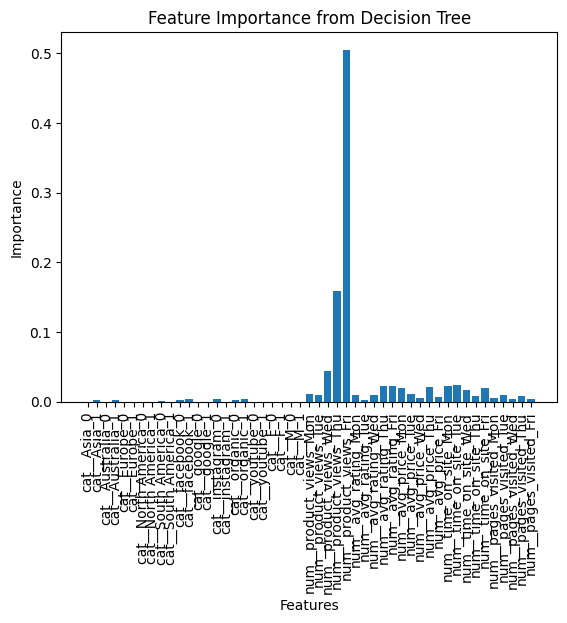

In [224]:
plt.bar(feature_names, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from Decision Tree')
plt.xticks(rotation=90) # Useful if you have many features
plt.show()


So the previous sections explained why I think female, instagram, south_america and time_spent on site all the major features caused the conversion on friday. In the feature engineeering part, I choose to create several dummy variables for categorical variable:visitor_location,marketing_channel, and gender and insert them back into our initial dataframe. For model selction, because our problem is a multivariate classification problem of what's the main driven to convert customers successfully on friday, we will be using 5 classification models: logistic regression, Decesion Tree Classifier, KNN,svc and Naive BAYES.

After we get the precesion score, recall_score, f1-score of these models. we deceide to choose Dicision Tree Classifier as our final model, since it procides the highest f1-score among the total five models, and also,F1_score as the metric for evaluating the model because it provides a balanced measure of both precision and recall.Also,dicision tree classifier are likely to help us to find the features which perfectly sperate the classes we're interested in predicting a multivariate classification problem.

In the business process, decision tree classifier can help business quickly target on the major features that drive the outcome. For instance, which decison drives a customer to download or not download the app?